In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [105]:
class particle():
    def __init__(self, x0, y0, z0, l, a, c):
        self.x = x0
        self.y = y0
        self.z = z0
        self.r = self.get_r(x0, y0, z0)
        self.a = a
        self.c = c
        self.l = l
    
    def get_r(self, x, y, z):
        return np.sqrt(x**2 + y**2 + z**2)
    
    def step(self, theta, phi):
        next_z = self.z + self.l*np.cos(theta)
        next_x = self.x + self.l*np.sin(theta)*np.cos(phi)
        next_y = self.y + self.l*np.sin(theta)*np.sin(phi)
        next_r = self.get_r(next_x, next_y, next_z)
        if next_r < self.a:
            return self.x, self.y, self.z, self.r, True
        elif next_r >= self.c:
#             print('absorbed')
            return -1
        else:
            self.x, self.y, self.z, self.r = next_x, next_y, next_z, next_r
            return self.x, self.y, self.z, self.r, False

In [72]:
a = 1
c = 10
l = a/100

In [106]:
def simulate_walker(b, pflag=True):
    n = 0
    steps = 0
    maxSteps = 1e7
    p = particle(0,0,b,l,a,c)
    x,y,z,r = [],[],[],[]
    while True:
        theta = np.pi*np.random.rand()
        phi = 2*np.pi*np.random.rand()
        tup = p.step(theta, phi)
        steps += 1
        if tup==-1 or steps>=maxSteps:
            break
        else:
            x.append(tup[0])
            y.append(tup[1])
            z.append(tup[2])
            r.append(tup[3])
            if tup[4]:
                n+=1
    print('b={} : absorbed in steps : {}'.format(b, steps))
    print('b={} : number of reflections : {}'.format(b, n))
    
    if pflag:
        plt.figure(figsize=(20, 10))
        plt.title('spatial coordinates and radial distance with time, initial loc = ({}, {}, {})'.format(0,0,b))
        plt.plot(list(range(steps-1)), x, 'r', label='x')
        plt.plot(list(range(steps-1)), y, 'g', label='y')
        plt.plot(list(range(steps-1)), z, 'b', label='z')
        plt.plot(list(range(steps-1)), r, 'orange', label='r')
        plt.xlabel('time steps')
        plt.ylabel('co-ords')
        plt.legend()
    return n, steps

b=2 : absorbed in steps : 868348
b=2 : number of reflections : 29


(29, 868348)

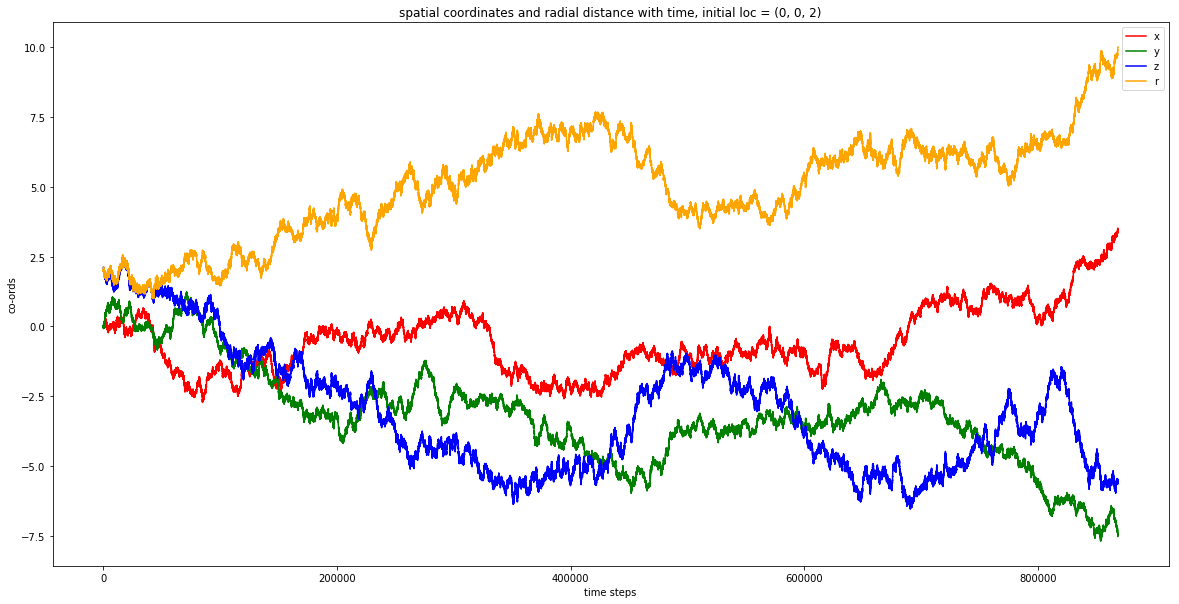

In [108]:
simulate_walker(2)

# Simulating ensemble of particles for many different staring points

In [124]:
bs = list(1+np.array(list(range(9))))
n_avgs = []
t_avgs = []
for b in bs:
    print('--------- simulating ensembles with b = {} -----------'.format(b))
    ns = []
    ts = []
    for i in range(10):
        n,t = simulate_walker(b, False)
        ns.append(n), ts.append(t)
    n_avgs.append(np.mean(ns))
    t_avgs.append(np.mean(ts))
    print('for b={}: n_avg={}, t_avg={}'.format(b, np.mean(ns), np.mean(ts)))
    print('\n\n')

--------- simulating ensembles with b = 1 -----------
b=1 : absorbed in steps : 449354
b=1 : number of reflections : 8
b=1 : absorbed in steps : 1384001
b=1 : number of reflections : 578
b=1 : absorbed in steps : 1303743
b=1 : number of reflections : 184
b=1 : absorbed in steps : 1476975
b=1 : number of reflections : 86
b=1 : absorbed in steps : 440911
b=1 : number of reflections : 48
b=1 : absorbed in steps : 823763
b=1 : number of reflections : 58
b=1 : absorbed in steps : 1013006
b=1 : number of reflections : 70
b=1 : absorbed in steps : 566533
b=1 : number of reflections : 94
b=1 : absorbed in steps : 882337
b=1 : number of reflections : 232
b=1 : absorbed in steps : 715554
b=1 : number of reflections : 110
for b=1: n_avg=146.8, t_avg=905617.7



--------- simulating ensembles with b = 2 -----------
b=2 : absorbed in steps : 505754
b=2 : number of reflections : 0
b=2 : absorbed in steps : 480622
b=2 : number of reflections : 200
b=2 : absorbed in steps : 634086
b=2 : number of refl

/home/udion/anaconda3/envs/DeepCV3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


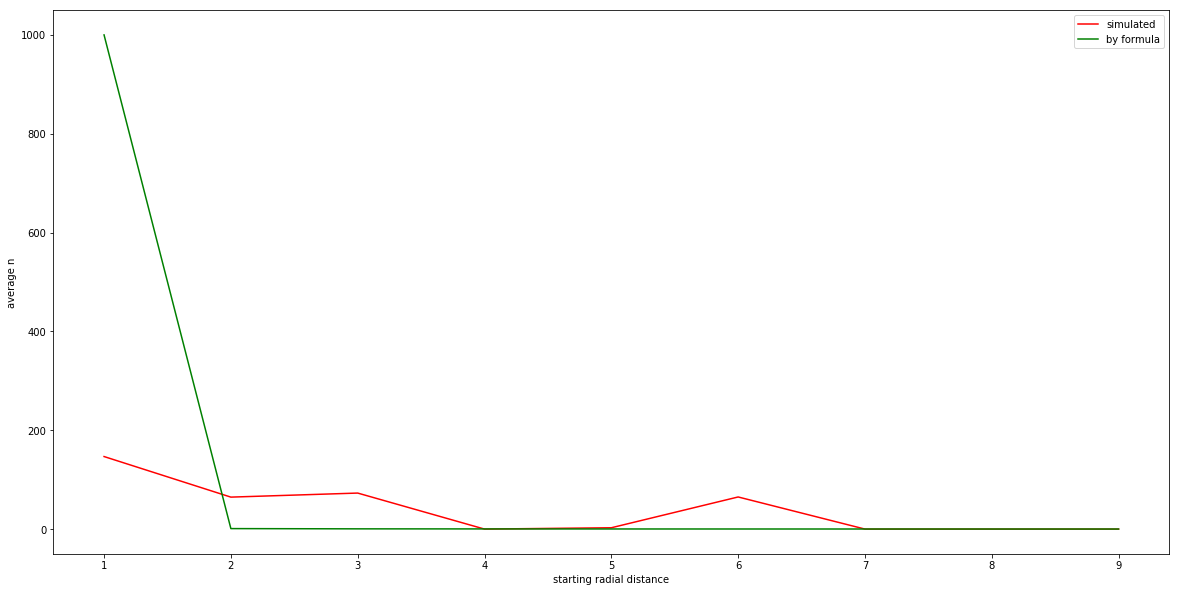

In [125]:
pred = np.array(bs)-a
pred[0] = 1e-7
pred = a/pred
pred[0] = 1000
plt.figure(figsize=(20,10))
plt.plot(bs, n_avgs, 'r-', label='simulated')
plt.plot(bs, pred, 'g-', label='by formula')
plt.ylabel('average n')
plt.xlabel('starting radial distance')
plt.legend()